<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/EJERCICIO1_3P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     E   J   E   R   C   I   C   I   O       1

1. Graficamente podemos observar que:

$$a= 190 , b=230, c=210$$

2. Definimos nuestra función de densidad

$$
f(x) =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    0 & \text{si } x < 190, \\
    \frac{2(x-190)}{800} & \text{si } 190 \leq x \leq 210, \\
    \frac{2(230 - x)}{800} & \text{si } 210 < x \leq 230, \\
    0 & \text{si } x > 230
\end{array}
\right.
\end{array}
$$

3. Queremos calcular la probabilida de

$$ P (\sum_{i=1}^{5} x_i > 1000 )$$

para  encontrar  la  probabilidad  de  que  la  suma  de  los  pesos  de  5  tinas exceda la capacidad del camión, en este caso $x_i$ representa el peso de la tina, por lo que si dividimos nuestra probabilidad anterior en 5, la capacidad de cada tina correspondera a la probabilidad siguiente:

$$ P( x > 200)$$

El teorema del limite central que nos dice que cuando la población muestrada es aproximadamente simetrica, la distribución muestral de $\bar{x}$ se  proxima a una distribución normal para valores relativamente pequeños de $n$ , en este caso para $n=5$, con media $\mu$ y desviasión estándar $\frac{\theta}{\sqrt{n}}$

4. Calculamos la media

$$ \mu =  \frac{a+b+c}{3} = \frac{190+230+210}{3} = 210$$

5. Calculamos la varianza

$$ \sigma^2 =  \frac{a^2+b^2+c^2-ab-ac-bc}{18} $$ $$ = \frac{(190)^2+(230)^2+(210)^2-(190)(230)-(190)(210)-(230)(210)}{18} $$ $$= \frac{200}{3} \approx{66.7} $$

6. Dado que se aproxima a una normal, tendremos que


\begin{align*}
P\left( \bar{x} > 200 \right) &= P\left( \bar{x} - \mu > 200 \right) \\
&= P\left( \frac{\bar{x} - \mu}{\sigma}\sqrt{n} > 200 \right) \\
&= P\left( \frac{\bar{x} - \mu}{\sigma} \sqrt{n}  > \frac{\bar{x} - \mu}{\sigma}\sqrt{n} \right) \\
&= P\left( Z > \frac{\bar{x} - \mu}{\sigma}\sqrt{5} \right)
\end{align*}

7. Sustituyendo valores tenomos que:

\begin{align*}
P\left( Z > \frac{\bar{x} - \mu}{\sigma}\sqrt{5} \right) &= P\left( Z > \frac{200 - 210}{\sqrt{66.7}}\sqrt{5} \right) \\
&= P(Z > -2.73) \\
&= 1 - P(Z < -2.73) \\
&= 1 - 0.0031 \\
&= 0.9969
\end{align*}

* Para simular esto, definiremos nuestra función acumulada

$$
F(x) =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    0 & \text{si } x \leq 190, \\
  \frac{(x-190)^2}{800} & \text{si } 190 \leq x \leq 210, \\
    1- \frac{(230-x)^2}{800} & \text{si } 210 < x \leq 230, \\
    1 & \text{si } 230 \leq x
\end{array}
\right.
\end{array}
$$

* Despejamos $x$ de nuestra función en partes:

Caso 1:

$$ \frac{(x-190)^2}{800} = u $$
$$ ⟹  (x-190)^2 = 800u $$
$$ ⟹  x = \sqrt{800u} + 190 $$

Caso 2:

$$1- \frac{(230-x)^2}{800} = u$$
$$ ⟹ - \frac{(230-x)^2}{800} = u-1$$
$$ ⟹ (-230+x)^2 = 800(u-1) $$
$$ ⟹ x= -\sqrt{800(1-u)}+230 $$

* Asi nuestra inversa es:
$$
F(x)^{-1} =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    \sqrt{800u} + 190 & \text{si } 0 \leq x \leq 0.5, \\
    -\sqrt{800(1-u)}+230 & \text{si } 0.5 < x \leq 1, \\
\end{array}
\right.
\end{array}
$$

* Vamos a codificar nuestra distribución, para ello ingresamos nuestras librerias

In [2]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math

P S E U D O C O D I G O

1. Generar un número uniforme $u$
2. Si $u < 0.5$  entonces $$x = \sqrt{800u} + 190 $$
   si no $$ x = -\sqrt{800(1-u)}+230$$
3. Salir x


In [10]:
def probtria(n):
   Lista = []
   for i in range(n):
    for j in range(5):
        u = rnd.random()
        if u <= 0.5:
            x = (800 * u)**0.5 + 190
        else:
            x = 230 - (800 * (1 - u))**0.5
        Lista.append(x)

   return Lista


* Realizamos la prueba tantas veces que queramos

In [11]:
G=probtria(1000000)

* Graficamos los resultados.

(array([  4174.,  12097.,  20226.,  27993.,  36151.,  44125.,  51864.,
         60147.,  68283.,  75557.,  84162.,  91692., 100463., 108095.,
        115919., 124012., 132018., 139915., 148031., 156217., 163361.,
        172148., 179480., 187561., 195007., 195825., 187443., 180466.,
        171519., 163507., 156080., 147824., 139456., 131455., 123690.,
        116384., 108190.,  99763.,  92335.,  84434.,  76408.,  68392.,
         60120.,  52523.,  44664.,  36291.,  28001.,  20341.,  12016.,
          4175.]),
 array([190.01282958, 190.81214771, 191.61146585, 192.41078398,
        193.21010212, 194.00942025, 194.80873839, 195.60805652,
        196.40737466, 197.20669279, 198.00601093, 198.80532906,
        199.6046472 , 200.40396533, 201.20328347, 202.00260161,
        202.80191974, 203.60123788, 204.40055601, 205.19987415,
        205.99919228, 206.79851042, 207.59782855, 208.39714669,
        209.19646482, 209.99578296, 210.79510109, 211.59441923,
        212.39373736, 213.1930555 , 

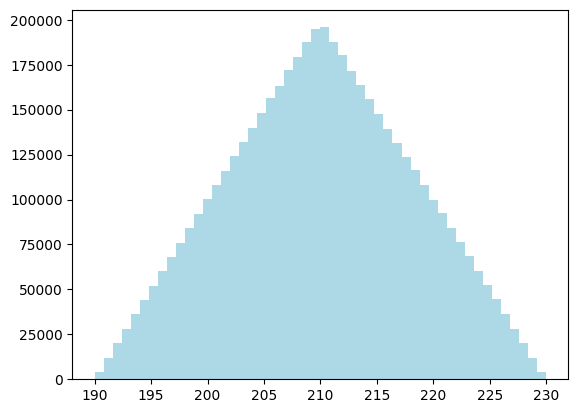

In [12]:
plt.hist(G, bins=50, color='lightblue')

* Verificamos que ciertamente se sigue una distribución triangular.
* Ahora veamos que si se proxima a una normal, para ello:


* Ahora simularemos las probabilidades

Veamos que $$x_i \sim Tri(a,b,c) : peso$$
la condición que tenemos es: $$ \sum_{i=1}^{5} x_i > 1000 $$
por lo que

In [62]:
def sum_tinas(a,b,c):
  n=20
  cont=0
  lista=[]
  for i in range(n):
    if sum(probtria(5)) > 1000:
      cont=cont+1
prob=cont/(i+1)
print(prob)
    lista.append(prob)
  return lista


In [63]:
A= sum_tinas(190,230,210)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [61]:
print(A)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


       E   J   E   R   C   I   C   I   O    2

1. En este caso, tomando las siguientes condiciones, calcularemos el costo esperado de enviar la mercancia:

 * Cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de $200.

 * El costo promedio anual de un nuevo camión es de $60,000.

 * Se trabajan 5 días a la semana y 52 semanas al año.

 * La la probabilidad de que el peso de las tinas exceda la capacidad del camión es de 0.9969

 * La capacidad del camión es de una tonelada.

Con lo anterior , tenemos que

$$ ($200  \text{  / tina }) *(0.9969 \text{ / dia}) *(5 \text{ / dia}) *( 52 \text{ / semanas})$$





